                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Розмір датасету: (550, 7)
Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int6

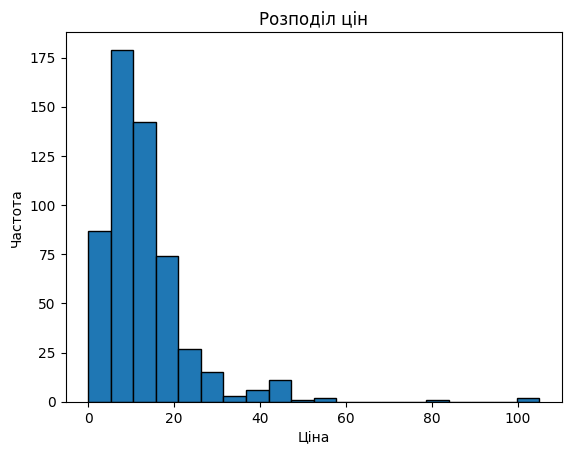

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0
Найвищий рейтинг: 4.9
Кількість книг з найвищим рейтингом: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Найдорожча книга з Топ-50 2015 року: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг жанру Fiction у Топ-50 2010 року: 20
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1
Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)
             Мінімальна ціна  Максимальна ціна
genre                                         
Fiction                    0                82
Non Fiction                0               105
                         author  Кількість книг
0              Abraham Verghese               2
1                Adam Gasiewski               1
2                 Adam Mansbach               1
3                     Adir Levy               1
4    Admiral William H. McRaven               1
..                      

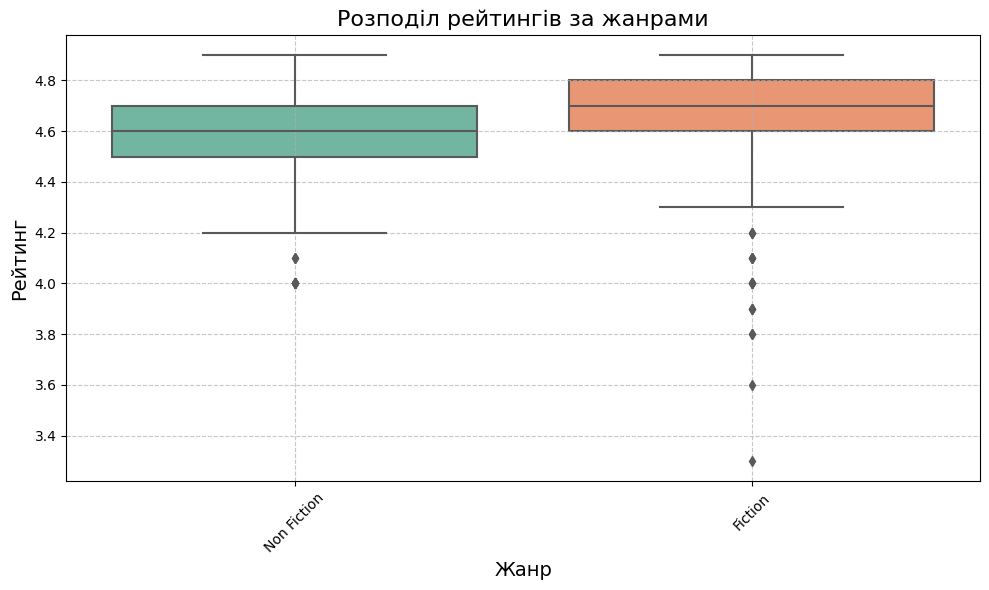

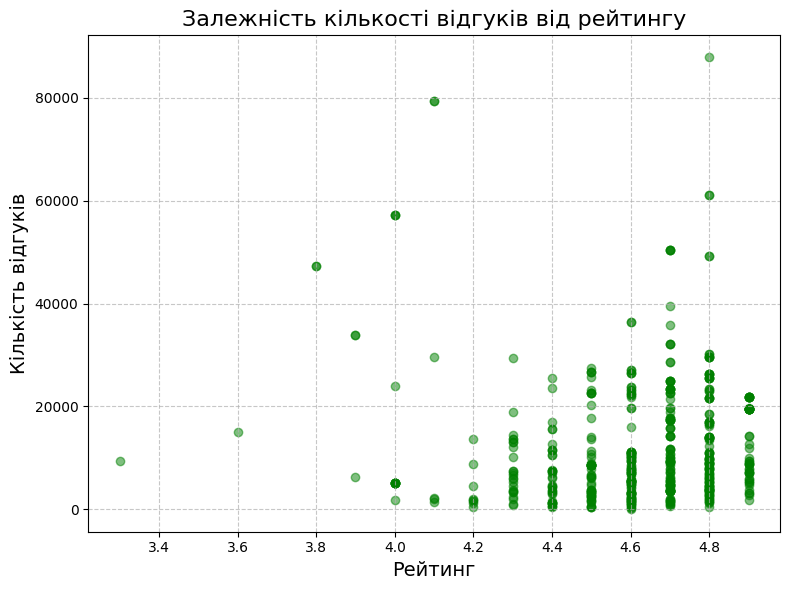

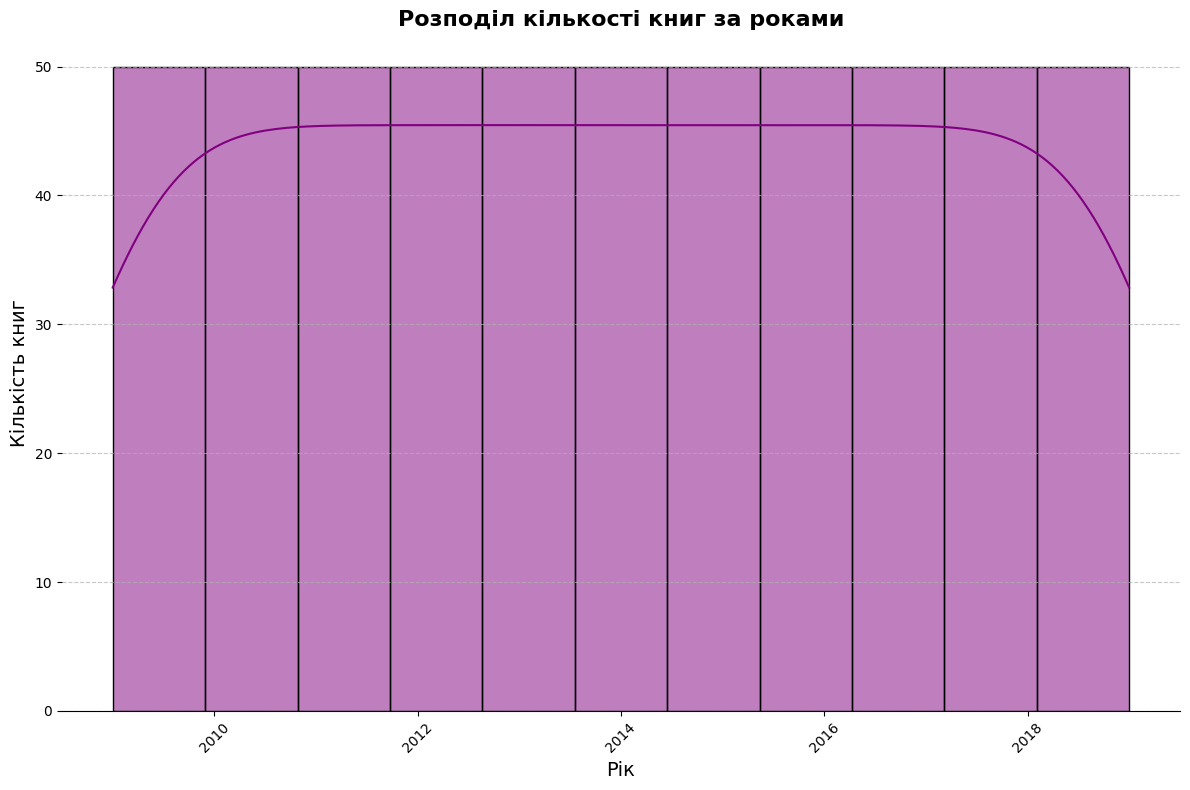

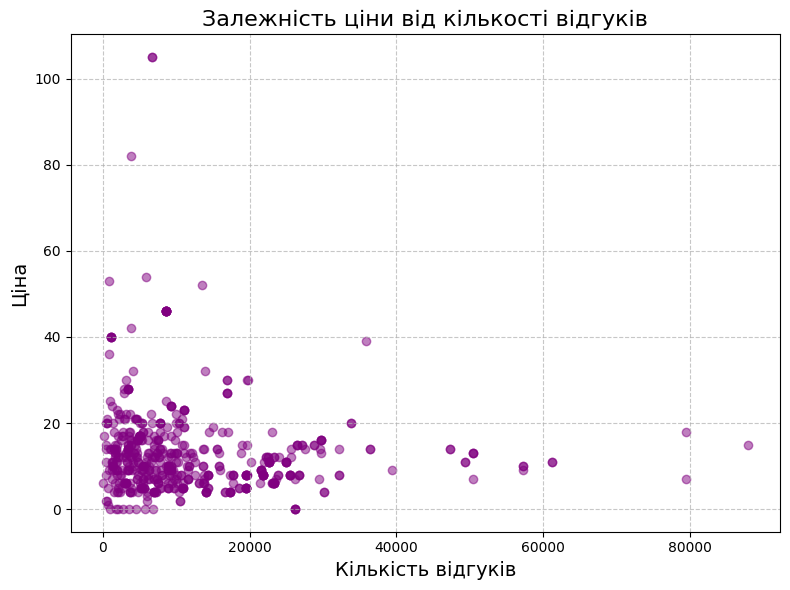

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Прочитати CSV файл
data = pd.read_csv('dataset.csv')

# Змінити назви стовпців
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Вивести перші 5 рядків
print(data.head())

# Вивести розміри датасету
print("Розмір датасету:", data.shape)

# Підрахунок пропусків у кожному стовпці
missing_values = data.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

# Унікальні жанри
unique_genres = data['genre'].unique()
print("Унікальні жанри:")
print(unique_genres)

# Побудувати гістограму цін
data['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()

# Обчислити статистики щодо цін
max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

# Який рейтинг у датасеті найвищий?
highest_rating = data['user_rating'].max()
print("Найвищий рейтинг:", highest_rating)

# Скільки книг мають такий рейтинг?
count_highest_rating = data[data['user_rating'] == highest_rating].shape[0]
print("Кількість книг з найвищим рейтингом:", count_highest_rating)

# Яка книга має найбільше відгуків?
most_reviews_book = data[data['reviews'] == data['reviews'].max()]['name'].values[0]
print("Книга з найбільшою кількістю відгуків:", most_reviews_book)

# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
top_2015 = data[data['year'] == 2015]
most_expensive_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]['name'].values[0]
print("Найдорожча книга з Топ-50 2015 року:", most_expensive_2015)

# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
count_fiction_2010 = data[(data['genre'] == 'Fiction') & (data['year'] == 2010)].shape[0]
print("Кількість книг жанру Fiction у Топ-50 2010 року:", count_fiction_2010)

# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
count_high_rated = data[(data['user_rating'] == 4.9) & ((data['year'] == 2010) | (data['year'] == 2011))].shape[0]
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", count_high_rated)

# Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values). Яка книга остання у відсортованому списку?
sorted_books = data[(data['year'] == 2015) & (data['price'] < 8)].sort_values(by='price')
last_book = sorted_books.iloc[-1]['name']
print("Остання книга у відсортованому списку:", last_book)

# Максимальна та мінімальна ціни для кожного з жанрів
genre_price_stats = data.groupby('genre')['price'].agg([('Мінімальна ціна', 'min'), ('Максимальна ціна', 'max')])
print(genre_price_stats)

# Створення датафрейму з кількістю книг для кожного автора
author_book_count = data.groupby('author').size().reset_index(name='Кількість книг')
print(author_book_count)

# Створення датафрейму з середнім рейтингом для кожного автора
author_avg_rating = data.groupby('author')['user_rating'].mean().reset_index(name='Середній рейтинг')
print(author_avg_rating)

# З'єднання датафреймів та сортування
author_stats = pd.concat([author_book_count, author_avg_rating['Середній рейтинг']], axis=1)
sorted_author_stats = author_stats.sort_values(by=['Кількість книг', 'Середній рейтинг'], ascending=[True, True])
print(sorted_author_stats)

# Графік розподілу рейтингів для книг з різними жанрами
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_rating', data=data, palette='Set2')
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.title('Розподіл рейтингів за жанрами', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Графік залежності кількості відгуків від рейтингу
plt.figure(figsize=(8, 6))
plt.scatter(data['user_rating'], data['reviews'], alpha=0.5, color='green')
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Кількість відгуків', fontsize=14)
plt.title('Залежність кількості відгуків від рейтингу', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Графік розподілу кількості книг за роками
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='year', bins=11, kde=True, color='purple')
plt.xlabel('Рік', fontsize=14)
plt.ylabel('Кількість книг', fontsize=14)
plt.title('Розподіл кількості книг за роками', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.despine(left=True)
plt.tight_layout()
plt.show()


# Графік залежності ціни від кількості відгуків
plt.figure(figsize=(8, 6))
plt.scatter(data['reviews'], data['price'], alpha=0.5, color='purple')
plt.xlabel('Кількість відгуків', fontsize=14)
plt.ylabel('Ціна', fontsize=14)
plt.title('Залежність ціни від кількості відгуків', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


